# 4-3 グラフマスターへの道

## 強連結成分分解

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
G_random = nx.gnp_random_graph(10, 0.15, directed=True)

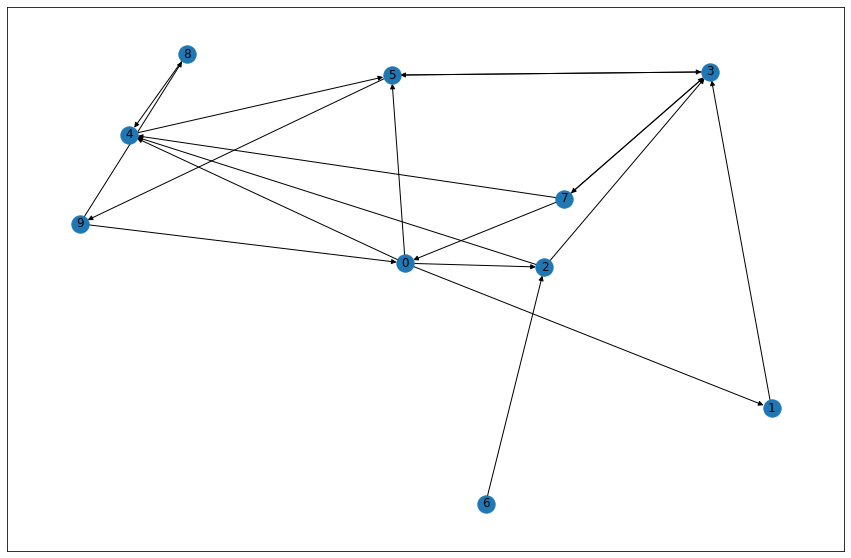

In [12]:
plt.figure(figsize=(15,10))
nx.draw_networkx(G_random)
plt.show()

In [339]:
from collections import deque

# 強連結成分分解に使うための関数
def dfs_go(G):
    visited = dict([])
    # vs:帰りがけ順
    vs = deque([])
    for s in G.node():
        if s not in visited:
            visited[s] = None
            Stack = deque([s])
            vs_tmp = deque([s])
            while Stack:
                v = Stack.pop()
                #if v not in vs_tmp:
                vs_tmp.appendleft(v)
                out_node = G[v]
                for u in out_node:
                    if u not in visited:
                        visited[u] = s
                        Stack.append(u)
            # deque + deque:dequeの連結が遅い
            # vs = vs_tmp + vs
            vs.extendleft(vs_tmp)
            
    return visited, vs

In [588]:
# 強連結成分分解に使うための関数
def dfs_back(G, vs):
    group = dict([])
    group_num = 0
    DAG = nx.DiGraph()
    Edges = []
    Nodes = dict([])
    for s in vs:
        if s not in group:
            w = 1
            Stack = deque([s])
            members = []
            while Stack:
                v = Stack.pop()
                members.append(v)
                group[v] = group_num
                in_node = G.predecessors(v)
                for u in in_node:
                    if u not in group:
                        group[u] = group_num
                        w += 1
                        Stack.append(u)
                    else:
                        if group_num !=  group[u]:
                            DAG.add_edge(group[u], group_num)
                            Edges.append((group[u], group_num))
            DAG.add_node(group_num, weight=w, members=members)
            Nodes[group_num] = {"weight":w, "members":members}
            group_num += 1
    return group, DAG, Nodes, Edges

In [589]:
def scc_DAG(G):
    visited ,vs = dfs_go(G)
    group, DAG, Nodes, Edges = dfs_back(G, vs)
    return group, DAG, Nodes, Edges

In [590]:
G_sample = nx.DiGraph()
weighted_edges = [[5,4,0.6],
                  [9,6,0.3],
                  [9,8,0.2],
                  [2,1,0.1],
                  [2,5,0.2],
                  [3,2,0.3],
                  [4,2,0.4],
                  [4,3,0.5],
                  [6,3,0.7],
                  [7,3,0.9],
                  [7,9,1.0],
                  [8,4,0.1],
                  [8,7,0.2],
                  [10,9,0.5]
                 ]
G_sample.add_weighted_edges_from(weighted_edges)

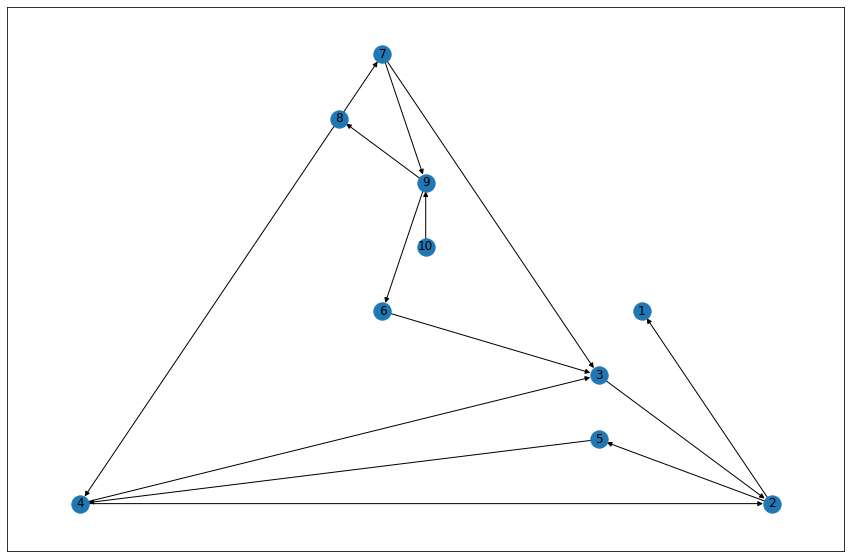

In [591]:
plt.figure(figsize=(15,10))
pos = nx.planar_layout(G_sample)
nx.draw_networkx(G_sample,pos)
plt.show()

In [592]:
group, DAG, Nodes, Edges = scc_DAG(G_sample)

In [593]:
group

{10: 0, 9: 1, 7: 1, 8: 1, 6: 2, 5: 3, 2: 3, 3: 3, 4: 3, 1: 4}

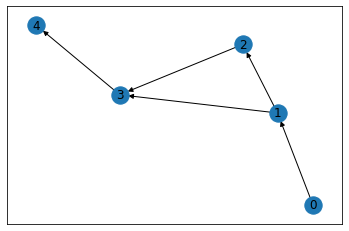

In [594]:
nx.draw_networkx(DAG)

In [595]:
DAG.nodes.data()

NodeDataView({0: {'weight': 1, 'members': [10]}, 1: {'weight': 3, 'members': [9, 7, 8]}, 2: {'weight': 1, 'members': [6]}, 3: {'weight': 4, 'members': [5, 2, 4, 3]}, 4: {'weight': 1, 'members': [1]}})

In [596]:
Nodes

{0: {'weight': 1, 'members': [10]},
 1: {'weight': 3, 'members': [9, 7, 8]},
 2: {'weight': 1, 'members': [6]},
 3: {'weight': 4, 'members': [5, 2, 4, 3]},
 4: {'weight': 1, 'members': [1]}}

In [597]:
DAG.nodes()

NodeView((0, 1, 2, 3, 4))

In [598]:
Edges

[(0, 1), (1, 2), (1, 3), (2, 3), (1, 3), (3, 4)]

In [599]:
DAG.edges

OutEdgeView([(0, 1), (1, 2), (1, 3), (2, 3), (3, 4)])

In [600]:
DAG.degree()

DiDegreeView({0: 1, 1: 3, 2: 2, 3: 3, 4: 1})

In [601]:
DAG.node[0]

{'weight': 1, 'members': [10]}

In [602]:
type(DAG)

networkx.classes.digraph.DiGraph